In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

data = pd.read_csv('data_cardiovascular_risk.csv')


data.set_index("id", inplace=True)

### Notes

- Only 22 subjects in this study reported both a prior stroke and developed CHD within the 10 year timeframe.
- The data reflects a 35.7% incidence rate of CHD across all factors.



In [156]:
data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [157]:
chd_group = data[data["TenYearCHD"] == 1]
non_chd_group = data[data["TenYearCHD"] == 0]

non_chd_group.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2879.000000,2805.000000,2858.000000,2842.000000,2879.000000,2879.000000,2879.000000,2848.000000,2879.000000,2879.000000,2872.000000,2879.000000,2614.000000,2879.0
mean,48.728031,1.993583,8.734430,0.023575,0.004168,0.282737,0.018757,235.279494,130.603856,82.194338,25.679565,75.875304,80.662969,0.0
std,8.417156,1.015199,11.622571,0.151747,0.064437,0.450408,0.135688,44.225940,20.710453,11.495256,4.016071,11.935491,18.868206,0.0
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,50.000000,16.480000,45.000000,40.000000,0.0
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,22.910000,68.000000,71.000000,0.0
50%,48.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,232.000000,127.000000,81.000000,25.230000,75.000000,78.000000,0.0
75%,55.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,141.000000,88.000000,27.870000,83.000000,86.000000,0.0
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,243.000000,142.500000,51.280000,143.000000,386.000000,0.0


In [158]:
grouped = data.groupby("TenYearCHD")

In [159]:
grouped.agg({"heartRate": ["mean","median"], "sysBP": ["mean", "median"], "diaBP": ["mean", "median"]})

heartRate              sysBP             diaBP       
                 mean median        mean median       mean median
TenYearCHD                                                       
0           75.875304   75.0  130.603856  127.0  82.194338   81.0
1           76.552941   75.0  143.854207  139.0  86.763209   85.0

In [160]:
smoking_group = data.groupby("is_smoking")
diabetes_group = data.groupby("diabetes")
stroke_group = data.groupby("prevalentStroke")

def rates_of_chd(dataset):
    return dataset.agg({"TenYearCHD": ["mean", "count"]})



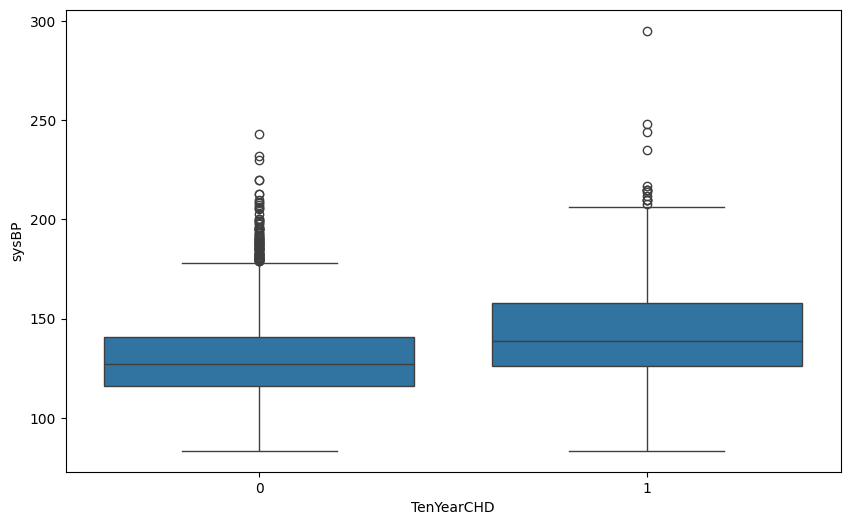

In [161]:
plt.figure(figsize=(10,6))
sns.boxplot(data = data, x="TenYearCHD", y="sysBP")
plt.show()

In [162]:
data.rename(columns={"sex": "Is Male"}, inplace=True)
data["Is Male"] = (data["Is Male"] == "M").astype(int)
cols = ["age", "Is Male", "cigsPerDay", "diaBP", "sysBP", "totChol", "BMI", "heartRate", "glucose", "TenYearCHD"]

target_df = data[cols]
target_df.fillna({"cigsPerDay": 0, "BMI": target_df["BMI"].median()}, inplace=True)

target_df.dropna(inplace=True)

/var/folders/ng/tt2m5s3d20v12sqlvz3tz3800000gn/T/ipykernel_5088/1500095470.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.fillna({"cigsPerDay": 0, "BMI": target_df["BMI"].median()}, inplace=True)
/var/folders/ng/tt2m5s3d20v12sqlvz3tz3800000gn/T/ipykernel_5088/1500095470.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df.dropna(inplace=True)


In [163]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(target_df)

scaled_data

array([[ 1.67075404, -0.89789994, -0.50594959, ...,  1.19087639,
        -0.08491808,  2.3547146 ],
       [-1.57664404,  1.11370984, -0.75863687, ..., -0.32146206,
        -0.29101561, -0.42467992],
       [-0.41685901, -0.89789994,  0.08365406, ...,  1.02283878,
         0.49215502, -0.42467992],
       ...,
       [-0.64881602,  1.11370984, -0.50594959, ..., -0.23744325,
        -0.41467414,  2.3547146 ],
       [ 1.20684003,  1.11370984, -0.75863687, ...,  0.35068836,
         0.12117945, -0.42467992],
       [ 0.51096901, -0.89789994, -0.75863687, ...,  0.26666956,
         0.409716  , -0.42467992]], shape=(3076, 10))

In [164]:
kmeans = KMeans(n_clusters=5)

clusters = kmeans.fit_predict(scaled_data)
target_df["Clusters"] = clusters

/var/folders/ng/tt2m5s3d20v12sqlvz3tz3800000gn/T/ipykernel_5088/2962574228.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df["Clusters"] = clusters


## Describing the Data:

- We can see a clear group with high blood sugar,
- There is a demographic that skews low in glucose, age, and BMI

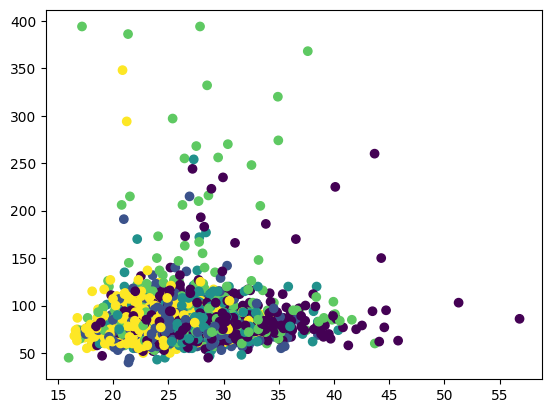

In [165]:
plt.scatter(target_df["BMI"], target_df["glucose"], c=target_df["Clusters"])

plt.show()

In [168]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score

rf_classifier = RandomForestClassifier(
    n_estimators=100
)

X = target_df[["age", "Is Male", "cigsPerDay", "diaBP", "sysBP", "totChol", "BMI", "heartRate", "glucose"]]
y = target_df["TenYearCHD"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
classification_report(y_test, y_pred)

Accuracy:  0.862012987012987


'              precision    recall  f1-score   support\n\n           0       0.88      0.98      0.93       536\n           1       0.35      0.07      0.12        80\n\n    accuracy                           0.86       616\n   macro avg       0.61      0.53      0.52       616\nweighted avg       0.81      0.86      0.82       616\n'